In [1]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt
import seaborn as sns

# importing libraries 

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix,roc_auc_score,roc_curve

from sklearn.model_selection import cross_val_score,GridSearchCV
%matplotlib inline


import warnings
warnings.filterwarnings('ignore')


df=pd.read_csv(r'C:\ProgramData\loan_prediction.csv')
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [2]:
df.shape

(614, 13)

In [3]:
# Important observations 
# 0)There are 614 rows and 13 columns
# 1) As there are only 13 columns ,we do not require PCA 
# 2) Most Features are numeric and continuous


#Loan_ID — Loan is of the Applicant applying for a loan
#Gender — Gender of the Applicant
#Married — marital status of applicant
#Dependents — Number of dependents of the Applicant
#Education — Education of the applicant
#Self_Employed — Applicant is self-employed or not
#ApplicantIncome — Applicant Income
#CoapplicantIncome — Co-applicant Income
#LoanAmount — Loan Amount
#Loan_Amount_Term — Term of the loan in months
#Credit_History — Previoud credit history of the applicant
#Property_Area — Urban, Semi-Urban, or Rural Areas
#Loan_Status — Loan Approval status 
# loan_Status is the target variable



In [4]:
# Exploratory Data Analysis

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [5]:
# Above data shows there are 614 rows and 13 columns ,all columns being of object datatype except CoapplicantIncome,
#LoanAmount,Loan_Amount_Term column ,Credit_History which are of float type and ApplicantIncome which are of integer type


In [6]:
# Statistical summary
df.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


In [7]:
# From the above data ,it is clear that ApplicantIncome ,Coapplicant Income std is more than mean ,so there are chances of 
# outliers in the data 

In [8]:
# checking for null values in dataset

df.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [9]:
# Filling null value for Gender ,Married columns

df['Gender'].value_counts()

Male      489
Female    112
Name: Gender, dtype: int64

In [10]:
df['Married'].value_counts()

Yes    398
No     213
Name: Married, dtype: int64

In [11]:
# Filling null value for Gender ,Married columns

df['Gender'].fillna(df['Gender'].mode()[0],inplace=True)
df['Married'].fillna(df['Married'].mode()[0],inplace=True)

In [12]:
# Filling null value for Dependents,Self_Employed,LoanAmount,Loan_Amount_Term,Credit_History columns

df['Dependents'].fillna(df['Dependents'].mode()[0], inplace=True)
df['Loan_Amount_Term'].fillna(df['Loan_Amount_Term'].mode()[0], inplace=True)
df['Credit_History'].fillna(df['Credit_History'].mode()[0], inplace=True)
df['Self_Employed'].fillna(df['Self_Employed'].mode()[0], inplace=True)
df['LoanAmount'].fillna(df['LoanAmount'].mean(), inplace=True)


<AxesSubplot:xlabel='Education', ylabel='ApplicantIncome'>

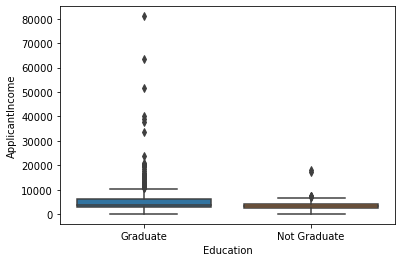

In [13]:
# Relation between education and ApplicantIncome

sns.boxplot(x='Education',y='ApplicantIncome',data=df)

In [14]:
# Clealry Graduate have better income than non-graduate and has outliers also.will check further that also

In [15]:
# converting categorical features into ordinal

cat_col= ['Gender','Married','Dependents','Education','Self_Employed','Property_Area','Loan_Status'] 
le= LabelEncoder()
for i in cat_col:   
    df[i] = le.fit_transform(df[i]) 

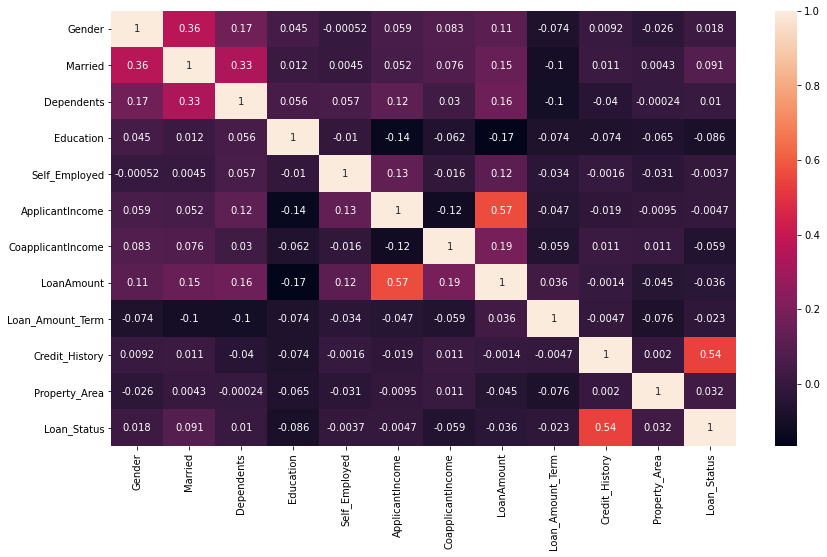

In [16]:
# checking correlation of independent variables with 'Loan_Status ' variable

plt.figure(figsize=(14,8))
corr_matrix=df.corr()
sns.heatmap(corr_matrix,annot=True)
plt.show()

In [17]:
corr_matrix['Loan_Status'].sort_values(ascending=False)

Loan_Status          1.000000
Credit_History       0.540556
Married              0.091478
Property_Area        0.032112
Gender               0.017987
Dependents           0.010118
Self_Employed       -0.003700
ApplicantIncome     -0.004710
Loan_Amount_Term    -0.022549
LoanAmount          -0.036416
CoapplicantIncome   -0.059187
Education           -0.085884
Name: Loan_Status, dtype: float64

In [18]:
# Clearly from above correlation matrix and data , 'Loan_Status ' has positive correlation maximum with Credit_History 
#and negatively correlated with Education ,CoapplicantIncome 


<function matplotlib.pyplot.show(close=None, block=None)>

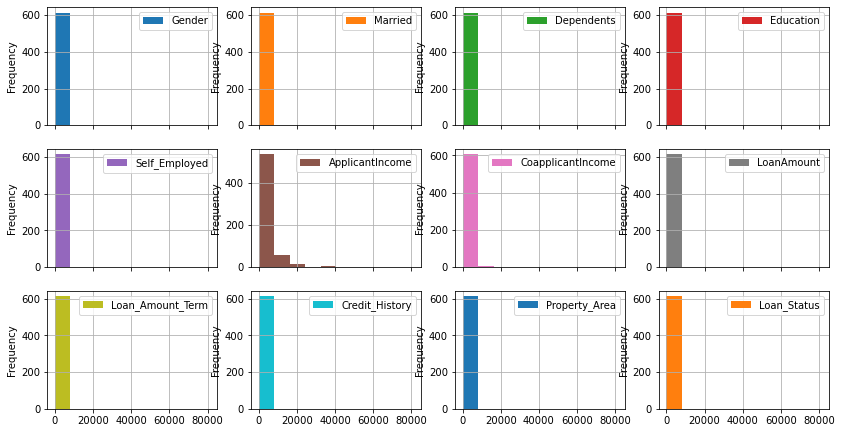

In [19]:
# Distribution plot of dataset

df.plot(kind='hist', subplots=True, layout=(4,4), figsize=(14,10), grid=True)
plt.show

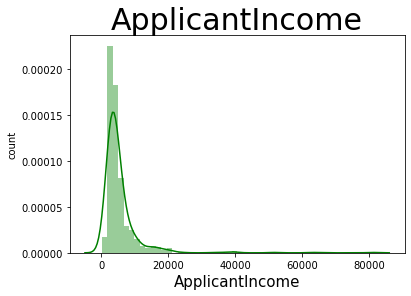

In [20]:
# checking distibution of ApplicantIncome feature

sns.distplot(df['ApplicantIncome'], color = 'green')
plt.title('ApplicantIncome', fontsize = 30)
plt.xlabel('ApplicantIncome', fontsize = 15)
plt.ylabel('count')
plt.show()

In [21]:
# Clearly above plot shows that data is rightly skewed

<function matplotlib.pyplot.show(close=None, block=None)>

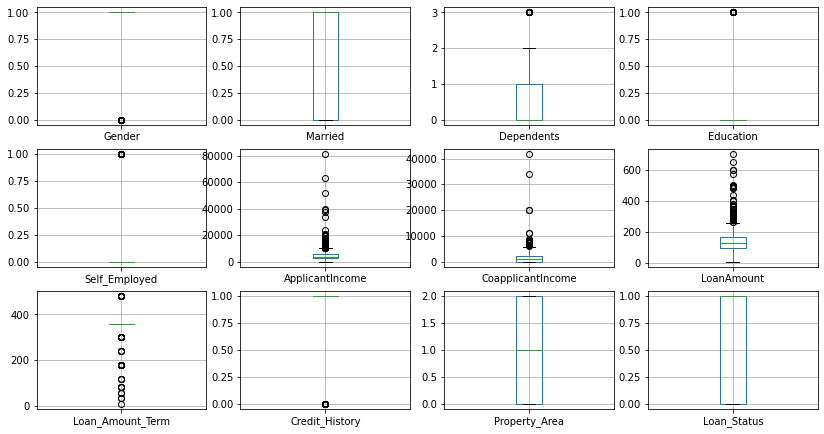

In [22]:
# Checking outliers in data


df.plot(kind='box', subplots=True, layout=(4,4), figsize=(14,10), grid=True)
plt.show

In [23]:
# Clearly there are many outliers present in different features in dataset

In [24]:
# Removing loan_id from dataset

df_new=df.drop(['Loan_ID'],axis=1)

In [25]:
# Removing Outliers

from scipy.stats import zscore
z= np.abs(zscore(df_new))



In [26]:
threshold = 3
print(np.where(z< 3))

(array([  0,   0,   0, ..., 613, 613, 613], dtype=int64), array([ 0,  1,  2, ...,  9, 10, 11], dtype=int64))


In [27]:
#Removing outliers

df_outlier = df_new[(z< 3).all(axis=1)]


In [28]:
# Rechecking of removal of outliers:

df.shape

(614, 13)

In [29]:
df_outlier.shape

(577, 12)

In [30]:
X=df_outlier.drop(['Loan_Status'],axis=1)
y=df_outlier['Loan_Status']

In [31]:
# Checking skewness in features

X.skew().sort_values()

Loan_Amount_Term    -2.098806
Credit_History      -1.976043
Gender              -1.622920
Married             -0.630211
Property_Area       -0.055332
Dependents           1.052106
LoanAmount           1.113132
Education            1.306588
CoapplicantIncome    1.350517
ApplicantIncome      2.148522
Self_Employed        2.252848
dtype: float64

In [32]:
# Clearing skewness can be observed 

In [33]:
# Removing skewness

from sklearn.preprocessing import power_transform
z = power_transform(X[0:])
data_new= pd.DataFrame(z,columns=X.columns)
X = data_new


In [34]:
# Checking skewness in features

X.skew().sort_values()

Credit_History      -1.976043
Gender              -1.622920
Married             -0.630211
CoapplicantIncome   -0.191876
Property_Area       -0.155094
ApplicantIncome      0.027981
LoanAmount           0.047692
Dependents           0.478360
Loan_Amount_Term     0.727533
Education            1.306588
Self_Employed        2.252848
dtype: float64

<function matplotlib.pyplot.show(close=None, block=None)>

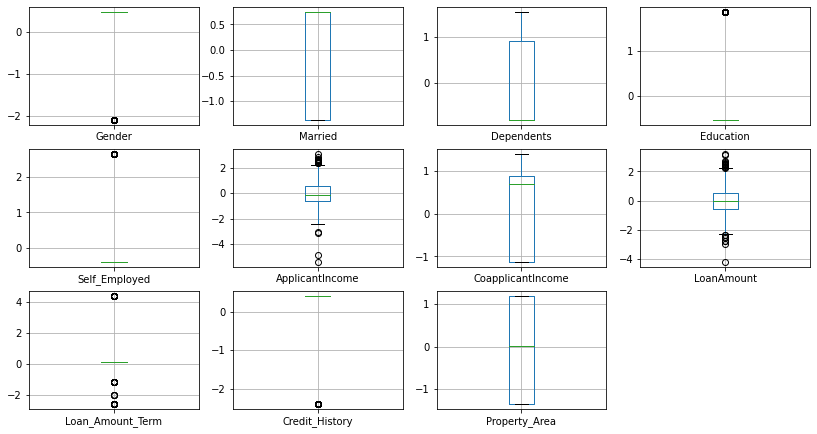

In [35]:
X.plot(kind='box', subplots=True, layout=(4,4), figsize=(14,10), grid=True)
plt.show

In [36]:
# Scaling the dataset


from sklearn.preprocessing import MinMaxScaler
X=MinMaxScaler().fit_transform(X)

In [37]:
# Evaluating models

# Training the model using LogisticRegression and evaluating the model

import numpy as np

from sklearn.model_selection import train_test_split

model_lr_1 = LogisticRegression()

score_s=0
state=0
for i in range(0,25):
    X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3, random_state =i)
    model_lr_1.fit(X_train, y_train)
    y_pred_lr_1 = model_lr_1.predict(X_test)
    score=accuracy_score(y_test,y_pred_lr_1)
    if score>score_s:
        score_s=score
        state=i
        
print('best random_state for LogisticRegression : ',state)
print('best accuracy score for LogisticRegression : ',score_s)

best random_state for LogisticRegression :  12
best accuracy score for LogisticRegression :  0.8850574712643678


In [38]:
# Accuracy score for LogisticRegression on training data

y_pred_lr_train = model_lr_1.predict(X_train)
score_train=accuracy_score(y_train,y_pred_lr_train)
print('best accuracy score for LogisticRegression on training data : ',score_train)

best accuracy score for LogisticRegression on training data :  0.8039702233250621


In [39]:
# Clearly there is overfitting as accuracy score for LogisticRegression on training data  is less than test data

In [40]:
# finding classification_report for LogisticRegression without removing overfitting

print(classification_report(y_test, y_pred_lr_1))

              precision    recall  f1-score   support

           0       0.96      0.50      0.66        50
           1       0.83      0.99      0.90       124

    accuracy                           0.85       174
   macro avg       0.90      0.75      0.78       174
weighted avg       0.87      0.85      0.83       174



In [41]:
# finding cross validation score without removing overfitting

cvs = cross_val_score(LogisticRegression(), X_test, y_test, scoring='accuracy', cv = 10).mean()
print("cross_val_score for LogisticRegression : ",cvs)

cross_val_score for LogisticRegression :  0.85


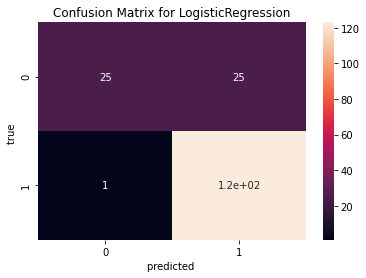

In [42]:
# confusion matrix of LogisticRegression model

cm=confusion_matrix(y_test,y_pred_lr_1)
plt.figure(figsize=(6,4))
sns.heatmap(cm,annot=True)
plt.xlabel("predicted ")
plt.ylabel("true ")
plt.title('Confusion Matrix for LogisticRegression')
plt.show()

In [43]:
# Training the model using DecisionTreeClassifier and evaluating the model

import numpy as np

from sklearn.model_selection import train_test_split

model_dtc = DecisionTreeClassifier()

score_s=0
state=0
for i in range(0,25):
    X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3, random_state =i)
    model_dtc.fit(X_train, y_train)
    y_pred_dtc = model_dtc.predict(X_test)
    score=accuracy_score(y_test,y_pred_dtc)
    if score>score_s:
        score_s=score
        state=i
        
print('best random_state for DecisionTreeClassifier : ',state)
print('best accuracy score for DecisionTreeClassifier : ',score_s)

best random_state for DecisionTreeClassifier :  9
best accuracy score for DecisionTreeClassifier :  0.764367816091954


In [44]:
# finding classification_report for DecisionTreeClassifier

print(classification_report(y_test, y_pred_dtc))

              precision    recall  f1-score   support

           0       0.52      0.66      0.58        50
           1       0.85      0.76      0.80       124

    accuracy                           0.73       174
   macro avg       0.69      0.71      0.69       174
weighted avg       0.75      0.73      0.74       174



In [45]:
# finding cross validation score for DecisionTreeClassifier 

cvs = cross_val_score(DecisionTreeClassifier(), X_test, y_test, scoring='accuracy', cv = 10).mean()
print("cross_val_score for DecisionTreeClassifier  : ",cvs)

cross_val_score for DecisionTreeClassifier  :  0.7480392156862744


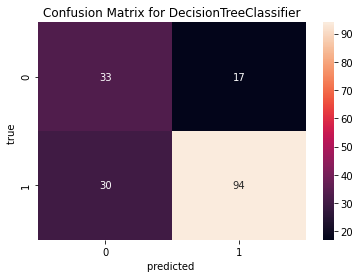

In [46]:
# confusion matrix of DecisionTreeClassifier  model

cm=confusion_matrix(y_test,y_pred_dtc)
plt.figure(figsize=(6,4))
sns.heatmap(cm,annot=True)
plt.xlabel("predicted ")
plt.ylabel("true ")
plt.title('Confusion Matrix for DecisionTreeClassifier')
plt.show()

In [47]:
# Training the model using SVC and evaluating the model

import numpy as np

from sklearn.model_selection import train_test_split

model_svc =SVC()

score_s=0
state=0
for i in range(0,25):
    X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3, random_state =i)
    model_svc.fit(X_train, y_train)
    y_pred_svc = model_svc.predict(X_test)
    score=accuracy_score(y_test,y_pred_svc)
    if score>score_s:
        score_s=score
        state=i
        
print('best random_state for SVC model : ',state)
print('best accuracy score for SVC model : ',score_s)


best random_state for SVC model :  12
best accuracy score for SVC model :  0.8850574712643678


In [48]:
# finding classification_report for SVC

print(classification_report(y_test, y_pred_svc))

              precision    recall  f1-score   support

           0       0.96      0.50      0.66        50
           1       0.83      0.99      0.90       124

    accuracy                           0.85       174
   macro avg       0.90      0.75      0.78       174
weighted avg       0.87      0.85      0.83       174



In [49]:
# finding cross validation score for SVC

cvs = cross_val_score(SVC(), X_test, y_test, scoring='accuracy', cv = 10).mean()
print("cross_val_score for LogisticRegression : ",cvs)

cross_val_score for LogisticRegression :  0.85


In [50]:
# Training the model using  KNeighborsClassifier and evaluating the model

import numpy as np

from sklearn.model_selection import train_test_split

model_knc = KNeighborsClassifier()

score_s=0
state=0
for i in range(0,25):
    X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3, random_state =i)
    model_knc.fit(X_train, y_train)
    y_pred_knc = model_knc.predict(X_test)
    score=accuracy_score(y_test,y_pred_knc)
    if score>score_s:
        score_s=score
        state=i
        
print('best random_state : ',state)
print('best accuracy score : ',score_s)


best random_state :  12
best accuracy score :  0.8390804597701149


In [51]:
# finding classification_report for KNeighborsClassifier

print(classification_report(y_test, y_pred_knc))

              precision    recall  f1-score   support

           0       0.70      0.52      0.60        50
           1       0.82      0.91      0.87       124

    accuracy                           0.80       174
   macro avg       0.76      0.72      0.73       174
weighted avg       0.79      0.80      0.79       174



In [52]:
# finding cross validation score for  KNeighborsClassifier

accuracy = cross_val_score( KNeighborsClassifier(), X_test, y_test, scoring='accuracy', cv = 10).mean()
print(accuracy)

0.8156862745098039


In [53]:
# Comparing accuracy score and cross val score of differnet models,SVC model seems to be best 
# model for this problem

In [54]:
# Minimizing overfitting using Ridge technique

from sklearn.linear_model import Ridge
from sklearn.model_selection import GridSearchCV
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3, random_state =0)
parameters = {'alpha':[.0001,.001,.01,.1,1,10],'random_state':list(range(0,10))}
model_r=Ridge()
clf=GridSearchCV(model_r,parameters)
clf.fit(X_train,y_train)
print(clf.best_params_)

{'alpha': 10, 'random_state': 0}


In [55]:
model_r =Ridge(alpha=10,random_state=0)
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3, random_state =0)
model_r.fit(X_train,y_train)
y_pred_r=model_r.predict(X_test)
score_r= accuracy_score(y_test,np.round(abs(y_pred_r)),normalize=False)
score_r

145

In [56]:
# Hyperparameter tuning using GridSearchCV

from sklearn.model_selection import GridSearchCV
 
# defining parameter range
param_grid = {'C': [0.1, 1, 10, 100, 1000],
              'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
              'kernel': ['rbf']}
 
grid = GridSearchCV(SVC(), param_grid, refit = True, verbose = 3)
 
# fitting the model for grid search
grid.fit(X_train, y_train)

Fitting 5 folds for each of 25 candidates, totalling 125 fits
[CV 1/5] END .....................C=0.1, gamma=1, kernel=rbf; total time=   0.0s
[CV 2/5] END .....................C=0.1, gamma=1, kernel=rbf; total time=   0.0s
[CV 3/5] END .....................C=0.1, gamma=1, kernel=rbf; total time=   0.0s
[CV 4/5] END .....................C=0.1, gamma=1, kernel=rbf; total time=   0.0s
[CV 5/5] END .....................C=0.1, gamma=1, kernel=rbf; total time=   0.0s
[CV 1/5] END ...................C=0.1, gamma=0.1, kernel=rbf; total time=   0.0s
[CV 2/5] END ...................C=0.1, gamma=0.1, kernel=rbf; total time=   0.0s
[CV 3/5] END ...................C=0.1, gamma=0.1, kernel=rbf; total time=   0.0s
[CV 4/5] END ...................C=0.1, gamma=0.1, kernel=rbf; total time=   0.0s
[CV 5/5] END ...................C=0.1, gamma=0.1, kernel=rbf; total time=   0.0s
[CV 1/5] END ..................C=0.1, gamma=0.01, kernel=rbf; total time=   0.0s
[CV 2/5] END ..................C=0.1, gamma=0.0

[CV 1/5] END ..................C=1000, gamma=0.1, kernel=rbf; total time=   0.0s
[CV 2/5] END ..................C=1000, gamma=0.1, kernel=rbf; total time=   0.0s
[CV 3/5] END ..................C=1000, gamma=0.1, kernel=rbf; total time=   0.0s
[CV 4/5] END ..................C=1000, gamma=0.1, kernel=rbf; total time=   0.0s
[CV 5/5] END ..................C=1000, gamma=0.1, kernel=rbf; total time=   0.0s
[CV 1/5] END .................C=1000, gamma=0.01, kernel=rbf; total time=   0.0s
[CV 2/5] END .................C=1000, gamma=0.01, kernel=rbf; total time=   0.0s
[CV 3/5] END .................C=1000, gamma=0.01, kernel=rbf; total time=   0.0s
[CV 4/5] END .................C=1000, gamma=0.01, kernel=rbf; total time=   0.0s
[CV 5/5] END .................C=1000, gamma=0.01, kernel=rbf; total time=   0.0s
[CV 1/5] END ................C=1000, gamma=0.001, kernel=rbf; total time=   0.0s
[CV 2/5] END ................C=1000, gamma=0.001, kernel=rbf; total time=   0.0s
[CV 3/5] END ...............

GridSearchCV(estimator=SVC(),
             param_grid={'C': [0.1, 1, 10, 100, 1000],
                         'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
                         'kernel': ['rbf']},
             verbose=3)

In [57]:
# print best parameter after tuning
print(grid.best_params_)
 
# print how our model looks after hyper-parameter tuning
print(grid.best_estimator_)

{'C': 1, 'gamma': 0.1, 'kernel': 'rbf'}
SVC(C=1, gamma=0.1)


In [58]:
grid_predictions = grid.predict(X_test)
 
# print classification report
print(classification_report(y_test, grid_predictions))

              precision    recall  f1-score   support

           0       0.93      0.49      0.64        53
           1       0.82      0.98      0.89       121

    accuracy                           0.83       174
   macro avg       0.87      0.74      0.77       174
weighted avg       0.85      0.83      0.82       174



In [59]:

accuracy_score(y_test,grid_predictions)    # checking final accuracy


0.8333333333333334

In [ ]:
# Final accuracy_score clearly states that SVC model is very good enough to predict 'Loan application status'

In [60]:
# AUC_ROC curve

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0 ,test_size=0.3)

svm_1= SVC()
svm_1.fit(X_train,y_train)
y_predicted_svm_1=svm_1.predict(X_test)


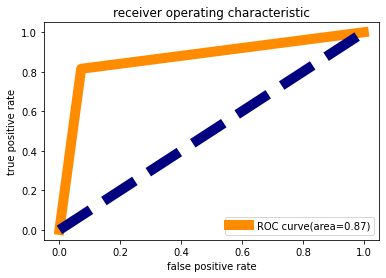

In [62]:

from sklearn.metrics import roc_curve,auc
fpr,tpr,thresholds=roc_curve(y_predicted_svm_1,y_test)
roc_auc=auc(fpr,tpr)

plt.figure()
plt.plot(fpr,tpr,color='darkorange',lw=10,label='ROC curve(area=%0.2f)'% roc_auc)
plt.plot([0,1],[0,1],color='navy',lw=10,linestyle='--')
plt.xlabel('false positive rate')
plt.ylabel('true positive rate')
plt.title('receiver operating characteristic')
plt.legend(loc='lower right')
plt.show()

In [ ]:
# Above roc_curve area clearly states the goodness of SVC model for predicting Loan application status

In [63]:
# Exporting the model through pickle

import pickle
filename='loan_app_status.pkl'
pickle.dump(svm_1,open(filename,'wb'))

In [65]:
# Conclusion:

import numpy as np
a=np.array(y_test)
predicted=np.array(svm_1.predict(X_test))
df_com=pd.DataFrame({'original':a,'predcited':predicted},index=range(len(a)))
df_com.head(20)

,original,predcited
0,1,1
1,0,0
2,1,1
3,0,1
4,1,1
5,0,0
6,1,1
7,1,1
8,1,1
9,1,1
